In [2]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_bloch_multivector ,plot_histogram
from numpy import pi
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.primitives import BackendSamplerV2
import matplotlib.pyplot as plt

## Não violação da Desigualdade de Bell


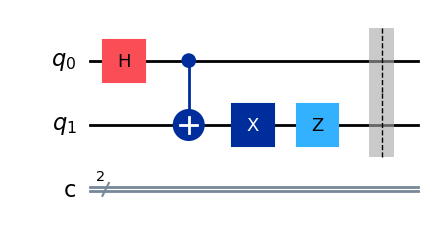

In [ ]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
import numpy as np

qc = QuantumCircuit(2,2) 
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)

state = Statevector(qc)

qc.barrier()

qc.draw("mpl")




In [3]:
state.draw('latex', prefix="| \\psi\\rangle =")

<IPython.core.display.Latex object>

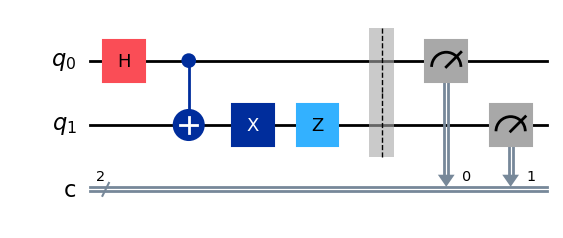

In [4]:
qc.measure([0,1],[0,1])
qc.draw("mpl")

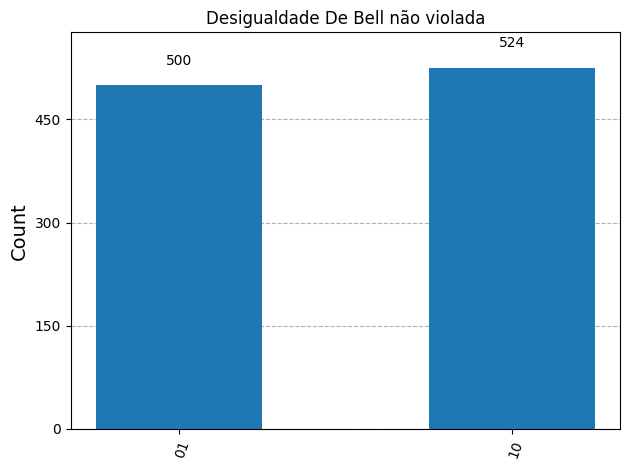

In [5]:
sim_ideal = AerSimulator()
result = sim_ideal.run(transpile(qc, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Desigualdade De Bell não violada')

---

## Violando a desigualdade de Bell

Circuito 1 com θ = -2.09 rad


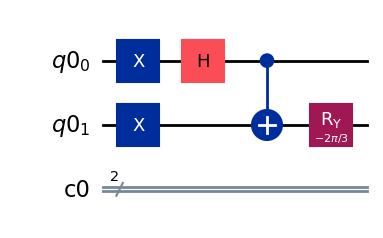

Circuito 2 com θ = -4.19 rad


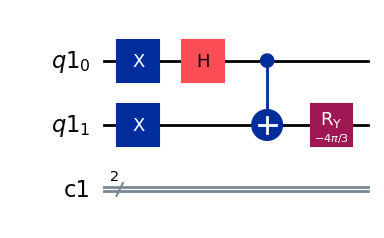

Circuito 3 com θ = 2.09 rad


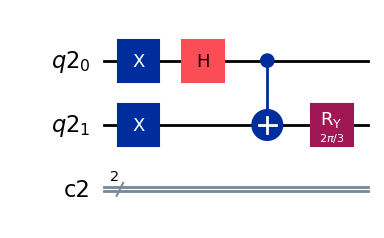

Circuito 4 com θ = 4.19 rad


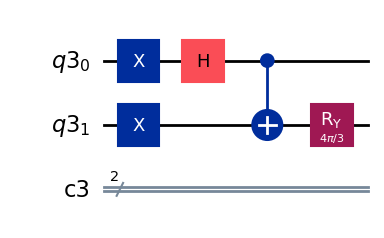

In [4]:
# Função para criar o circuito Bell com uma rotação específica
def create_bell_circuit(theta):
    rq = QuantumRegister(2)
    rc = ClassicalRegister(2)
    bell = QuantumCircuit(rq, rc)

    # Criação do estado de Bell
    bell.x([0,1])
    bell.h(0)
    bell.cx(0,1)

    # Aplicação da rotação no qubit 1
    bell.ry(theta, 1)

    return bell

# Diferentes ângulos de rotação
angles = [-2*pi/3, -4*pi/3, 2*pi/3, 4*pi/3]

circuits = [create_bell_circuit(theta) for theta in angles]

for i, circuit in enumerate(circuits):
    print(f'Circuito {i+1} com θ = {angles[i]:.2f} rad')
    display(circuit.draw('mpl'))

Circuito 1 com θ = -2.09 rad


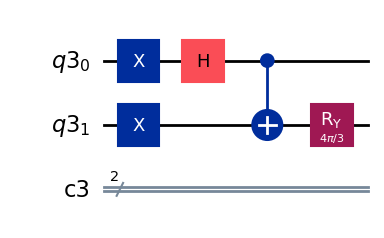

In [10]:
print(f'Circuito 1 com θ = {angles[0]:.2f} rad')
display(circuits[3].draw('mpl'))

Circuito 1 com θ = -2.09 rad


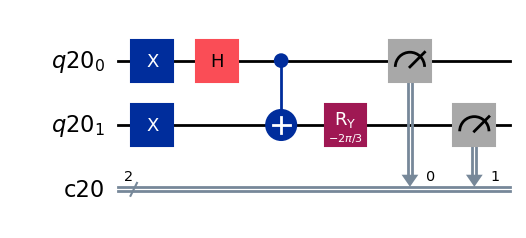

Circuito 2 com θ = -4.19 rad


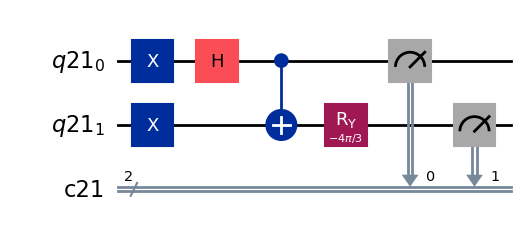

Circuito 3 com θ = 2.09 rad


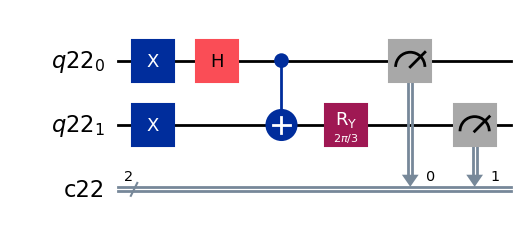

Circuito 4 com θ = 4.19 rad


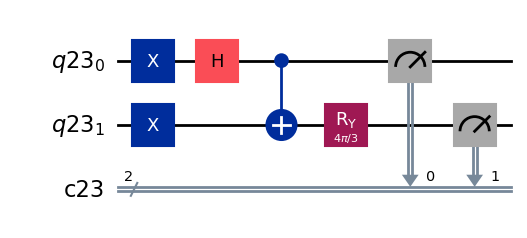

In [21]:
# Função para criar o circuito Bell com uma rotação específica e medições
def create_bell_circuit(theta):
    rq = QuantumRegister(2)
    rc = ClassicalRegister(2)
    bell = QuantumCircuit(rq, rc)

    # Criação do estado de Bell
    bell.x([0,1])
    bell.h(0)
    bell.cx(0,1)

    # Aplicação da rotação no qubit 1
    bell.ry(theta, 1)

    # Medições
    bell.measure(rq, rc)

    return bell

# Diferentes ângulos de rotação
angles = [-2*pi/3, -4*pi/3, 2*pi/3, 4*pi/3]

# Criar os circuitos com medição
circuits = [create_bell_circuit(theta) for theta in angles]

# Inicializar o Sampler da Aer
simulator = AerSimulator()

# Executar os circuitos
for i, circuit in enumerate(circuits):
    print(f'Circuito {i+1} com θ = {angles[i]:.2f} rad')
    display(circuit.draw('mpl'))
    
    # Executar o circuito
    job = simulator.run(circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()

    # Mostrar histograma
    plot_histogram(counts)
    plt.show()

Resultados para circuito 1: {'00': 361, '01': 117, '11': 412, '10': 134}


QiskitError: 'Data for experiment "circuit-186" could not be found.'

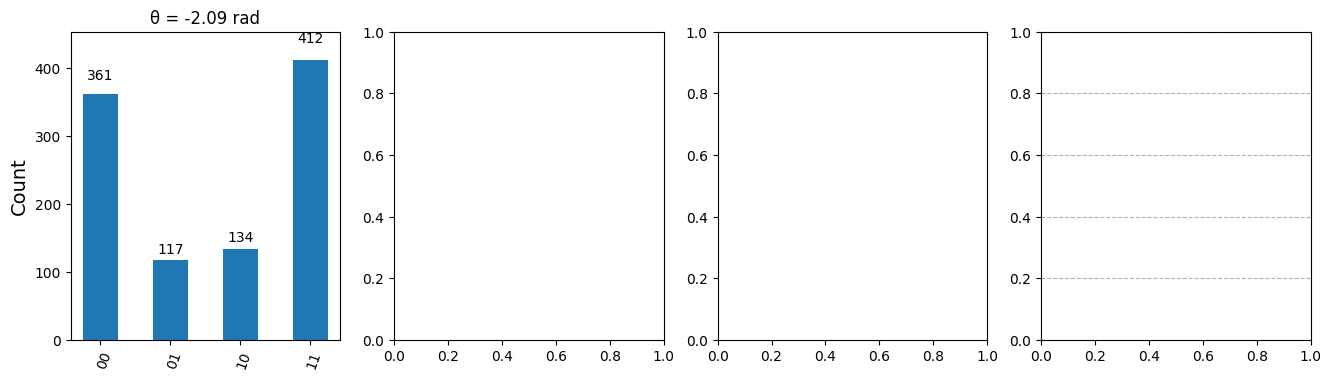

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(circuits), figsize=(4*len(circuits), 4))

for i, circuit in enumerate(circuits):
    counts = result.get_counts(circuit)
    print(f"Resultados para circuito {i+1}: {counts}")
    
    plot_histogram(counts, ax=axs[i])
    axs[i].set_title(f'θ = {angles[i]:.2f} rad')

plt.tight_layout()
plt.show()

Circuito 1 com θ = -2.09 rad


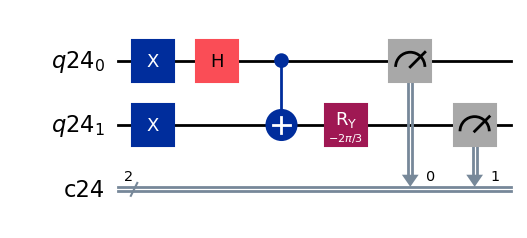

Circuito 2 com θ = -4.19 rad


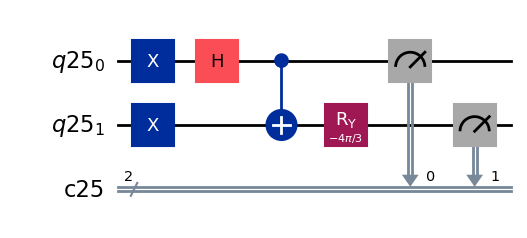

Circuito 3 com θ = 2.09 rad


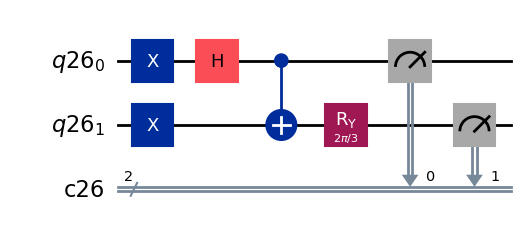

Circuito 4 com θ = 4.19 rad


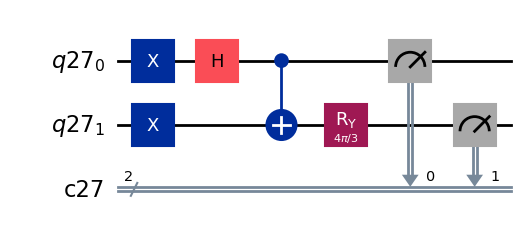

Resultados para circuito 1: {'11': 374, '00': 405, '10': 120, '01': 125}
Resultados para circuito 2: {'10': 126, '11': 375, '00': 394, '01': 129}
Resultados para circuito 3: {'00': 382, '11': 378, '10': 125, '01': 139}
Resultados para circuito 4: {'11': 377, '10': 115, '00': 411, '01': 121}


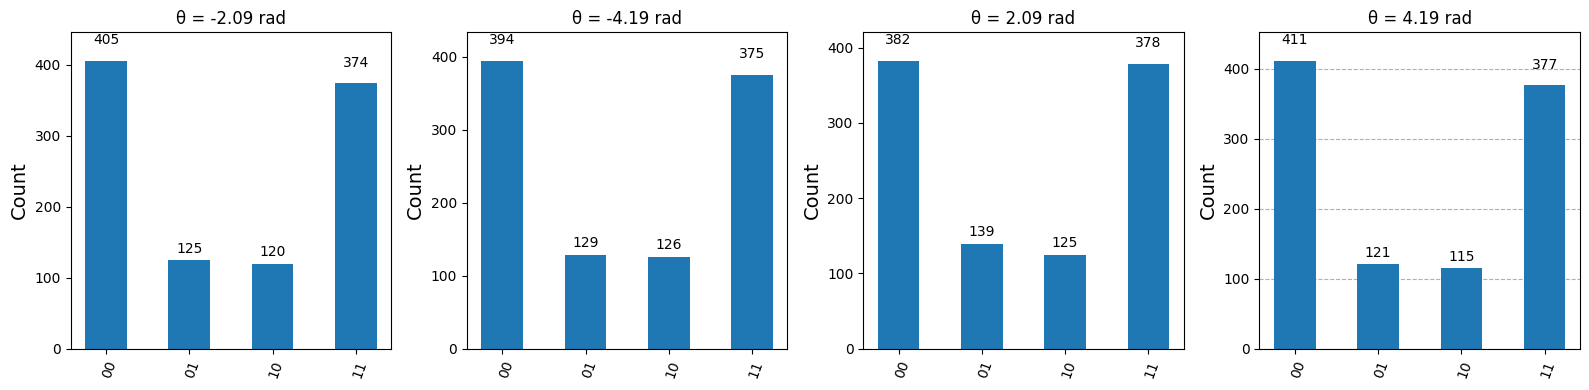

In [28]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as plt

# Função para criar o circuito Bell com uma rotação específica e medições
def create_bell_circuit(theta):
    rq = QuantumRegister(2)
    rc = ClassicalRegister(2)
    bell = QuantumCircuit(rq, rc)

    # Criação do estado de Bell
    bell.x([0,1])
    bell.h(0)
    bell.cx(0,1)

    # Aplicação da rotação no qubit 1
    bell.ry(theta, 1)

    # Medições
    bell.measure(rq, rc)

    return bell

# Diferentes ângulos de rotação
angles = [-2*pi/3, -4*pi/3, 2*pi/3, 4*pi/3]

# Criar os circuitos com medição
circuits = [create_bell_circuit(theta) for theta in angles]

# Inicializar o Sampler da Aer
simulator = AerSimulator()

# Armazenar resultados
results = []
counts_list = []

# Executar os circuitos e exibir
for i, circuit in enumerate(circuits):
    print(f'Circuito {i+1} com θ = {angles[i]:.2f} rad')
    display(circuit.draw('mpl'))
    
    # Executar o circuito
    job = simulator.run(circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    # Guardar resultados
    results.append(result)
    counts_list.append(counts)
    
    # Mostrar histograma
    plot_histogram(counts)
    plt.show()

# Plotar todos os histogramas em uma única figura
fig, axs = plt.subplots(1, len(circuits), figsize=(4*len(circuits), 4))

for i, counts in enumerate(counts_list):
    print(f"Resultados para circuito {i+1}: {counts}")
    
    plot_histogram(counts, ax=axs[i])
    axs[i].set_title(f'θ = {angles[i]:.2f} rad')

plt.tight_layout()
plt.show()
